In [1]:
library(tidyverse)
library(here)
library(lemon)
library(cowplot)

devtools::load_all(".")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
here() starts at /mnt/expressions/mp/ychr

Attaching package: ‘lemon’

The following object is masked from ‘package:purrr’:

    %||%


********************************************************
Note: As of version 1.0.0, cowplot does not change the
  default ggplot2 theme anymore. To recover the previous
  behavior, execute:
  theme_set(theme_cowplot())
********************************************************

Loading ychr


In [3]:
plot_damage <- function(arch, capture, ylim = 0.6) {
    p5_path <- here(paste0("data/damage/", capture, "_", arch, ".L30-1000_MQ0.5p_substitutions.txt"))
    p3_path <- here(paste0("data/damage/", capture, "_", arch, ".L30-1000_MQ0.3p_substitutions.txt"))

    p5 <- suppressWarnings(suppressMessages(read_tsv(p5_path))) %>% select(1:13) %>% rename(position = `#pos`) %>% mutate(end = "5' end")
    p3 <- suppressWarnings(suppressMessages(read_tsv(p3_path))) %>% select(1:13) %>% rename(position = `#pos`) %>% mutate(end = "3' end")

    subst_df <- bind_rows(p5, p3) %>%
        gather(subst, frequency, -position, -end) %>%
        mutate(substitution = case_when(
            subst == "CT" ~ "C-T",
            subst == "GA" ~ "G-A",
            TRUE ~ "other")
        )

    name <- fix_name(arch)

    p_p5 <- filter(subst_df, end == "5' end") %>% 
        ggplot(aes(position, frequency, color = substitution, linetype = substitution == "other", group = subst)) +
            geom_line() +
            theme_classic() +
            xlim(0, 30) +
            coord_capped_cart(ylim = c(0, ylim), left = "both", bottom = "both") +
            theme(legend.position = "none", legend.title = element_blank(), plot.title = element_text(size = 13)) +
            background_grid(major = "xy", minor = "xy") +
            ggtitle("", paste(paste(rep(" ", 33), collapse = ""), "5' end")) +
            scale_color_manual(values = c("#0072B2", "#D55E00", "lightgray")) +
            guides(linetype = FALSE) +
            background_grid(major = "xy", minor = "xy", size.major = 0.3, size.minor = 0.1,
                            color.major = rgb(0.8, 0.8, 0.8, alpha = 0.5),
                            color.minor = rgb(0.8, 0.8, 0.8, alpha = 0.5))

    p_p3 <- filter(subst_df, end == "3' end") %>% 
        ggplot(aes(position, frequency, color = substitution, linetype = substitution == "other", group = subst)) +
            geom_line() +
            theme_classic() +
            xlim(-30, 0) +
            coord_capped_cart(ylim = c(0, ylim), left = "both", bottom = "both") +
            theme(legend.position = "right", legend.title = element_blank(), plot.title = element_text(size = 13)) +
            background_grid(major = "xy", minor = "xy") +
            ggtitle("", paste(paste(rep(" ", 33), collapse = ""), "3' end")) +
            scale_color_manual(values = c("#0072B2", "#D55E00", "lightgray")) +
            guides(linetype = FALSE) +
            background_grid(major = "xy", minor = "xy", size.major = 0.3, size.minor = 0.1,
                            color.major = rgb(0.8, 0.8, 0.8, alpha = 0.5),
                            color.minor = rgb(0.8, 0.8, 0.8, alpha = 0.5))

    plot_grid(p_p5, p_p3, labels = name, hjust = "left", rel_widths = c(0.45, 0.55))
}

Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”

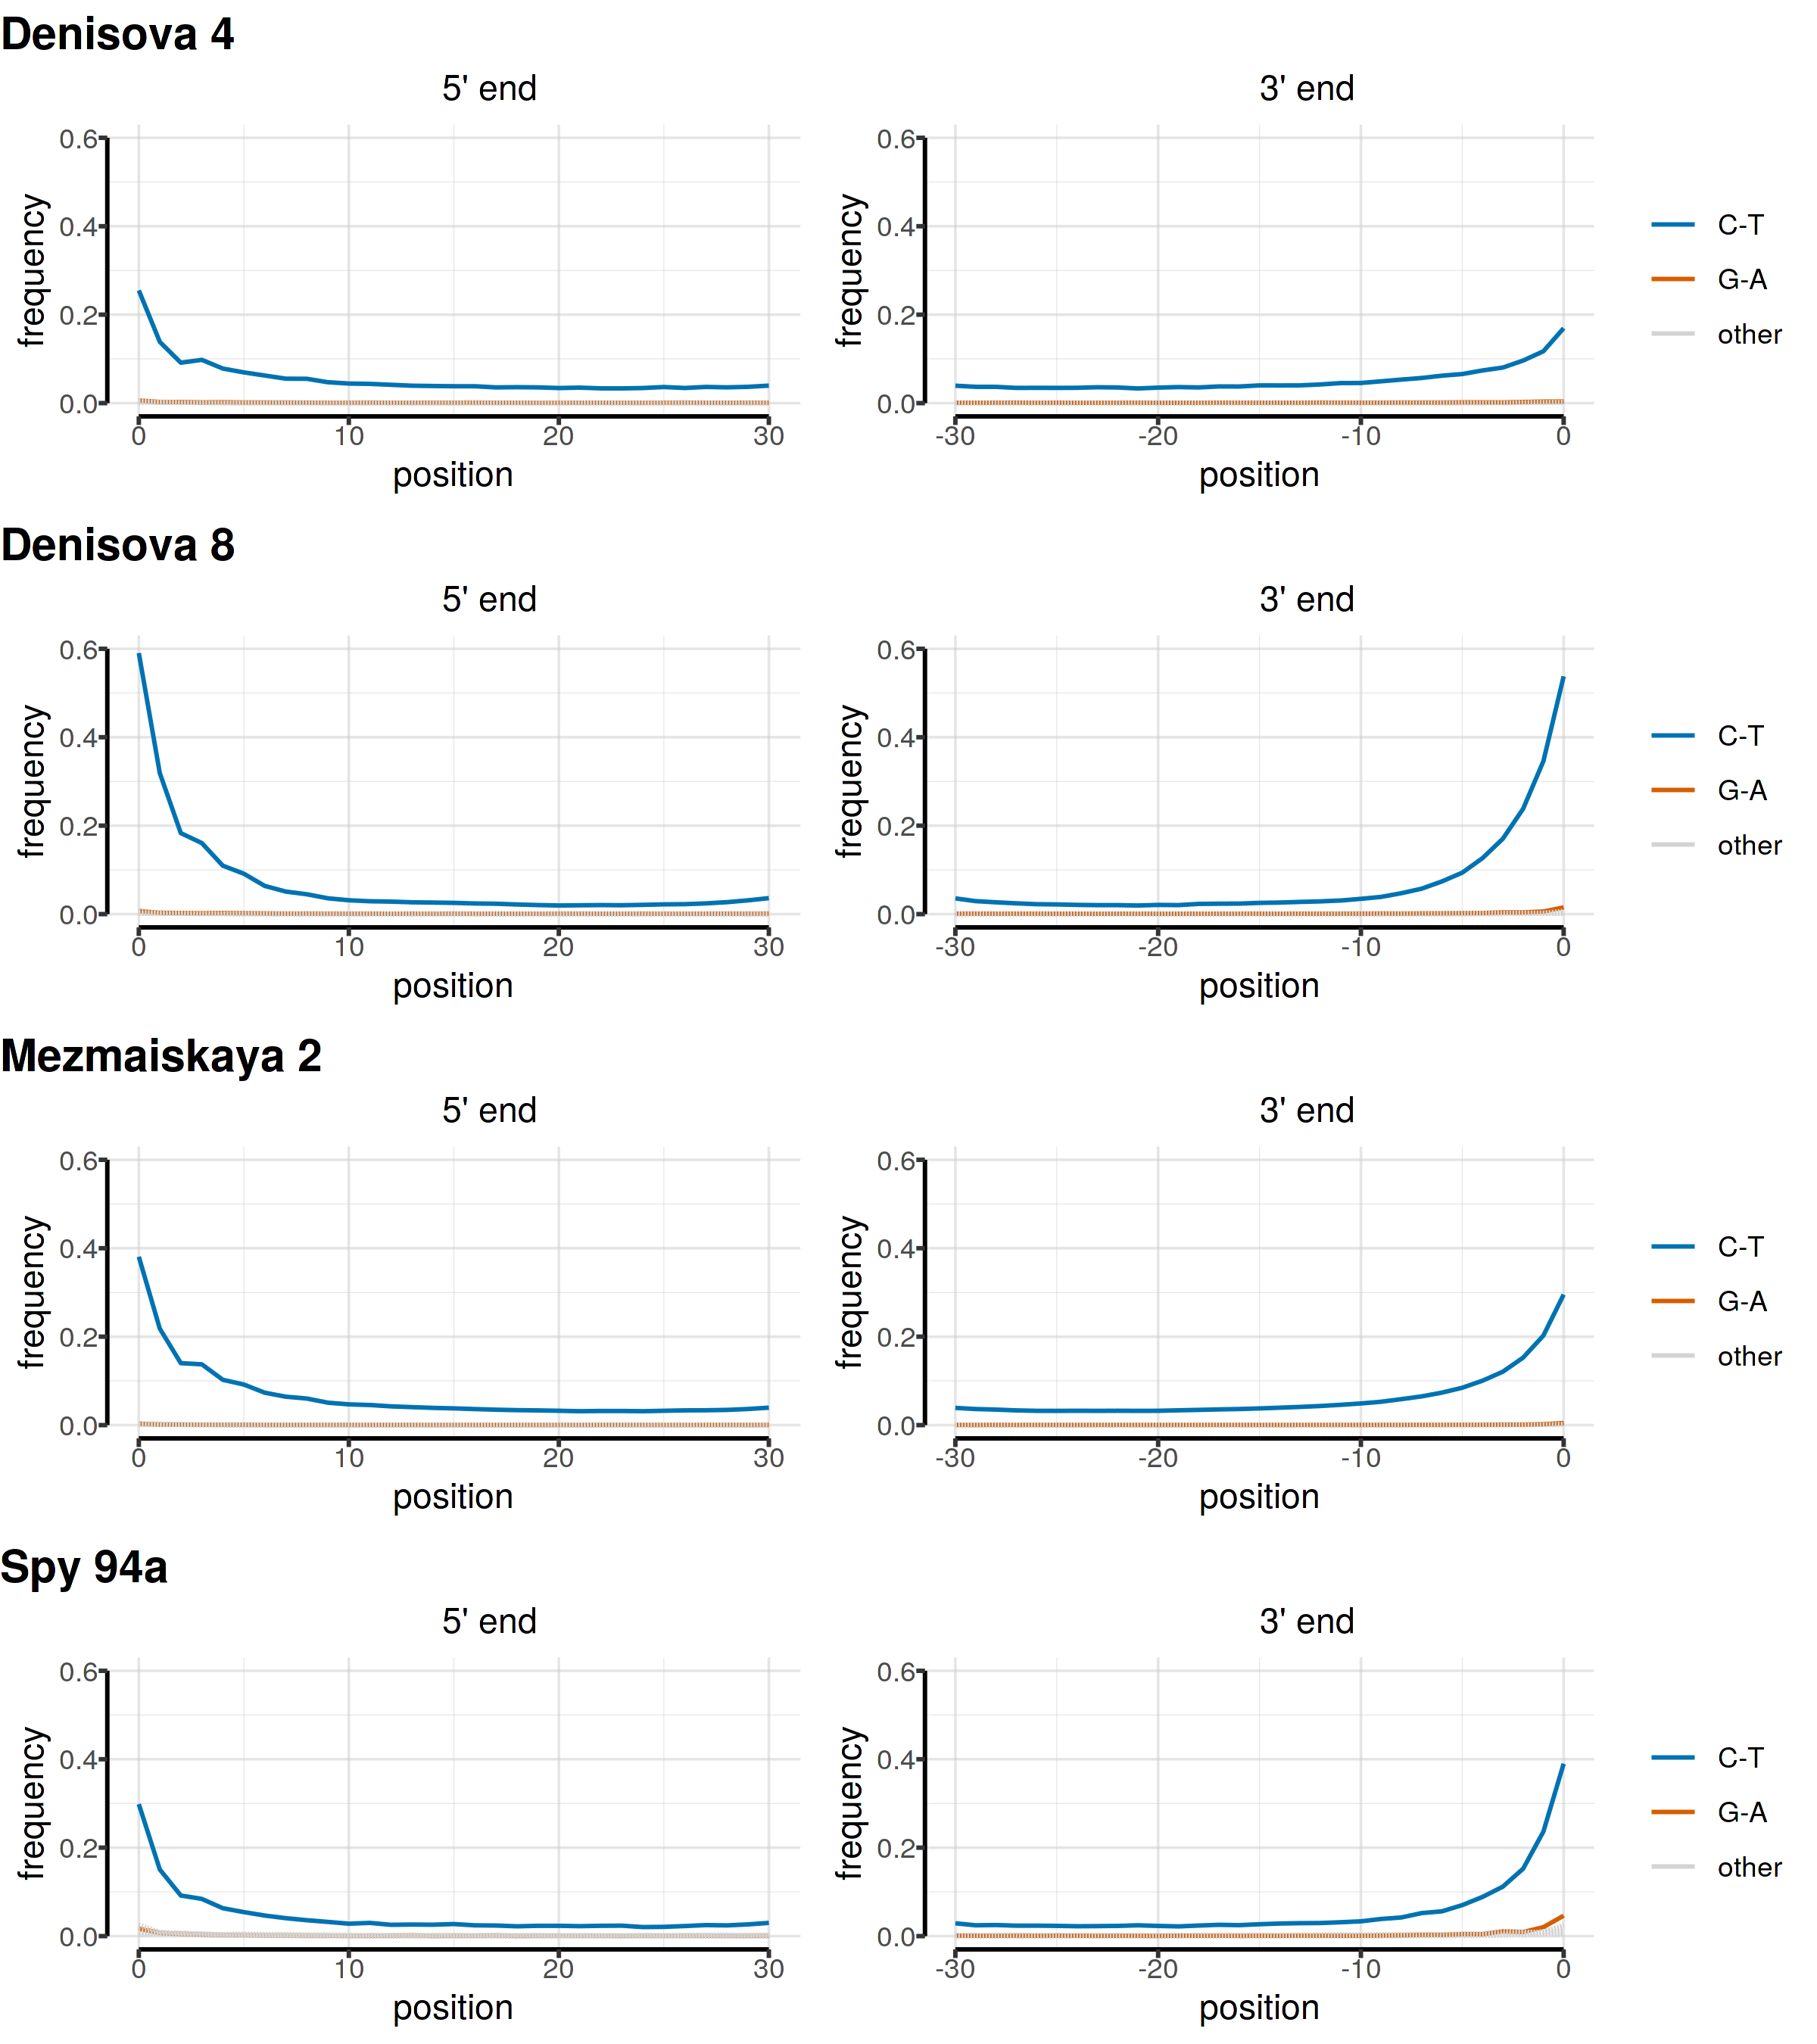

In [6]:
set_dim(8, 9)

plot_grid(
    plot_damage("den4", "full"),
    plot_damage("den8", "full"),
    plot_damage("mez2", "full"),
    plot_damage("spy1", "full"),
    ncol = 1
)

Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”Warning message:
“Removed 240 rows containing missing values (geom_path).”

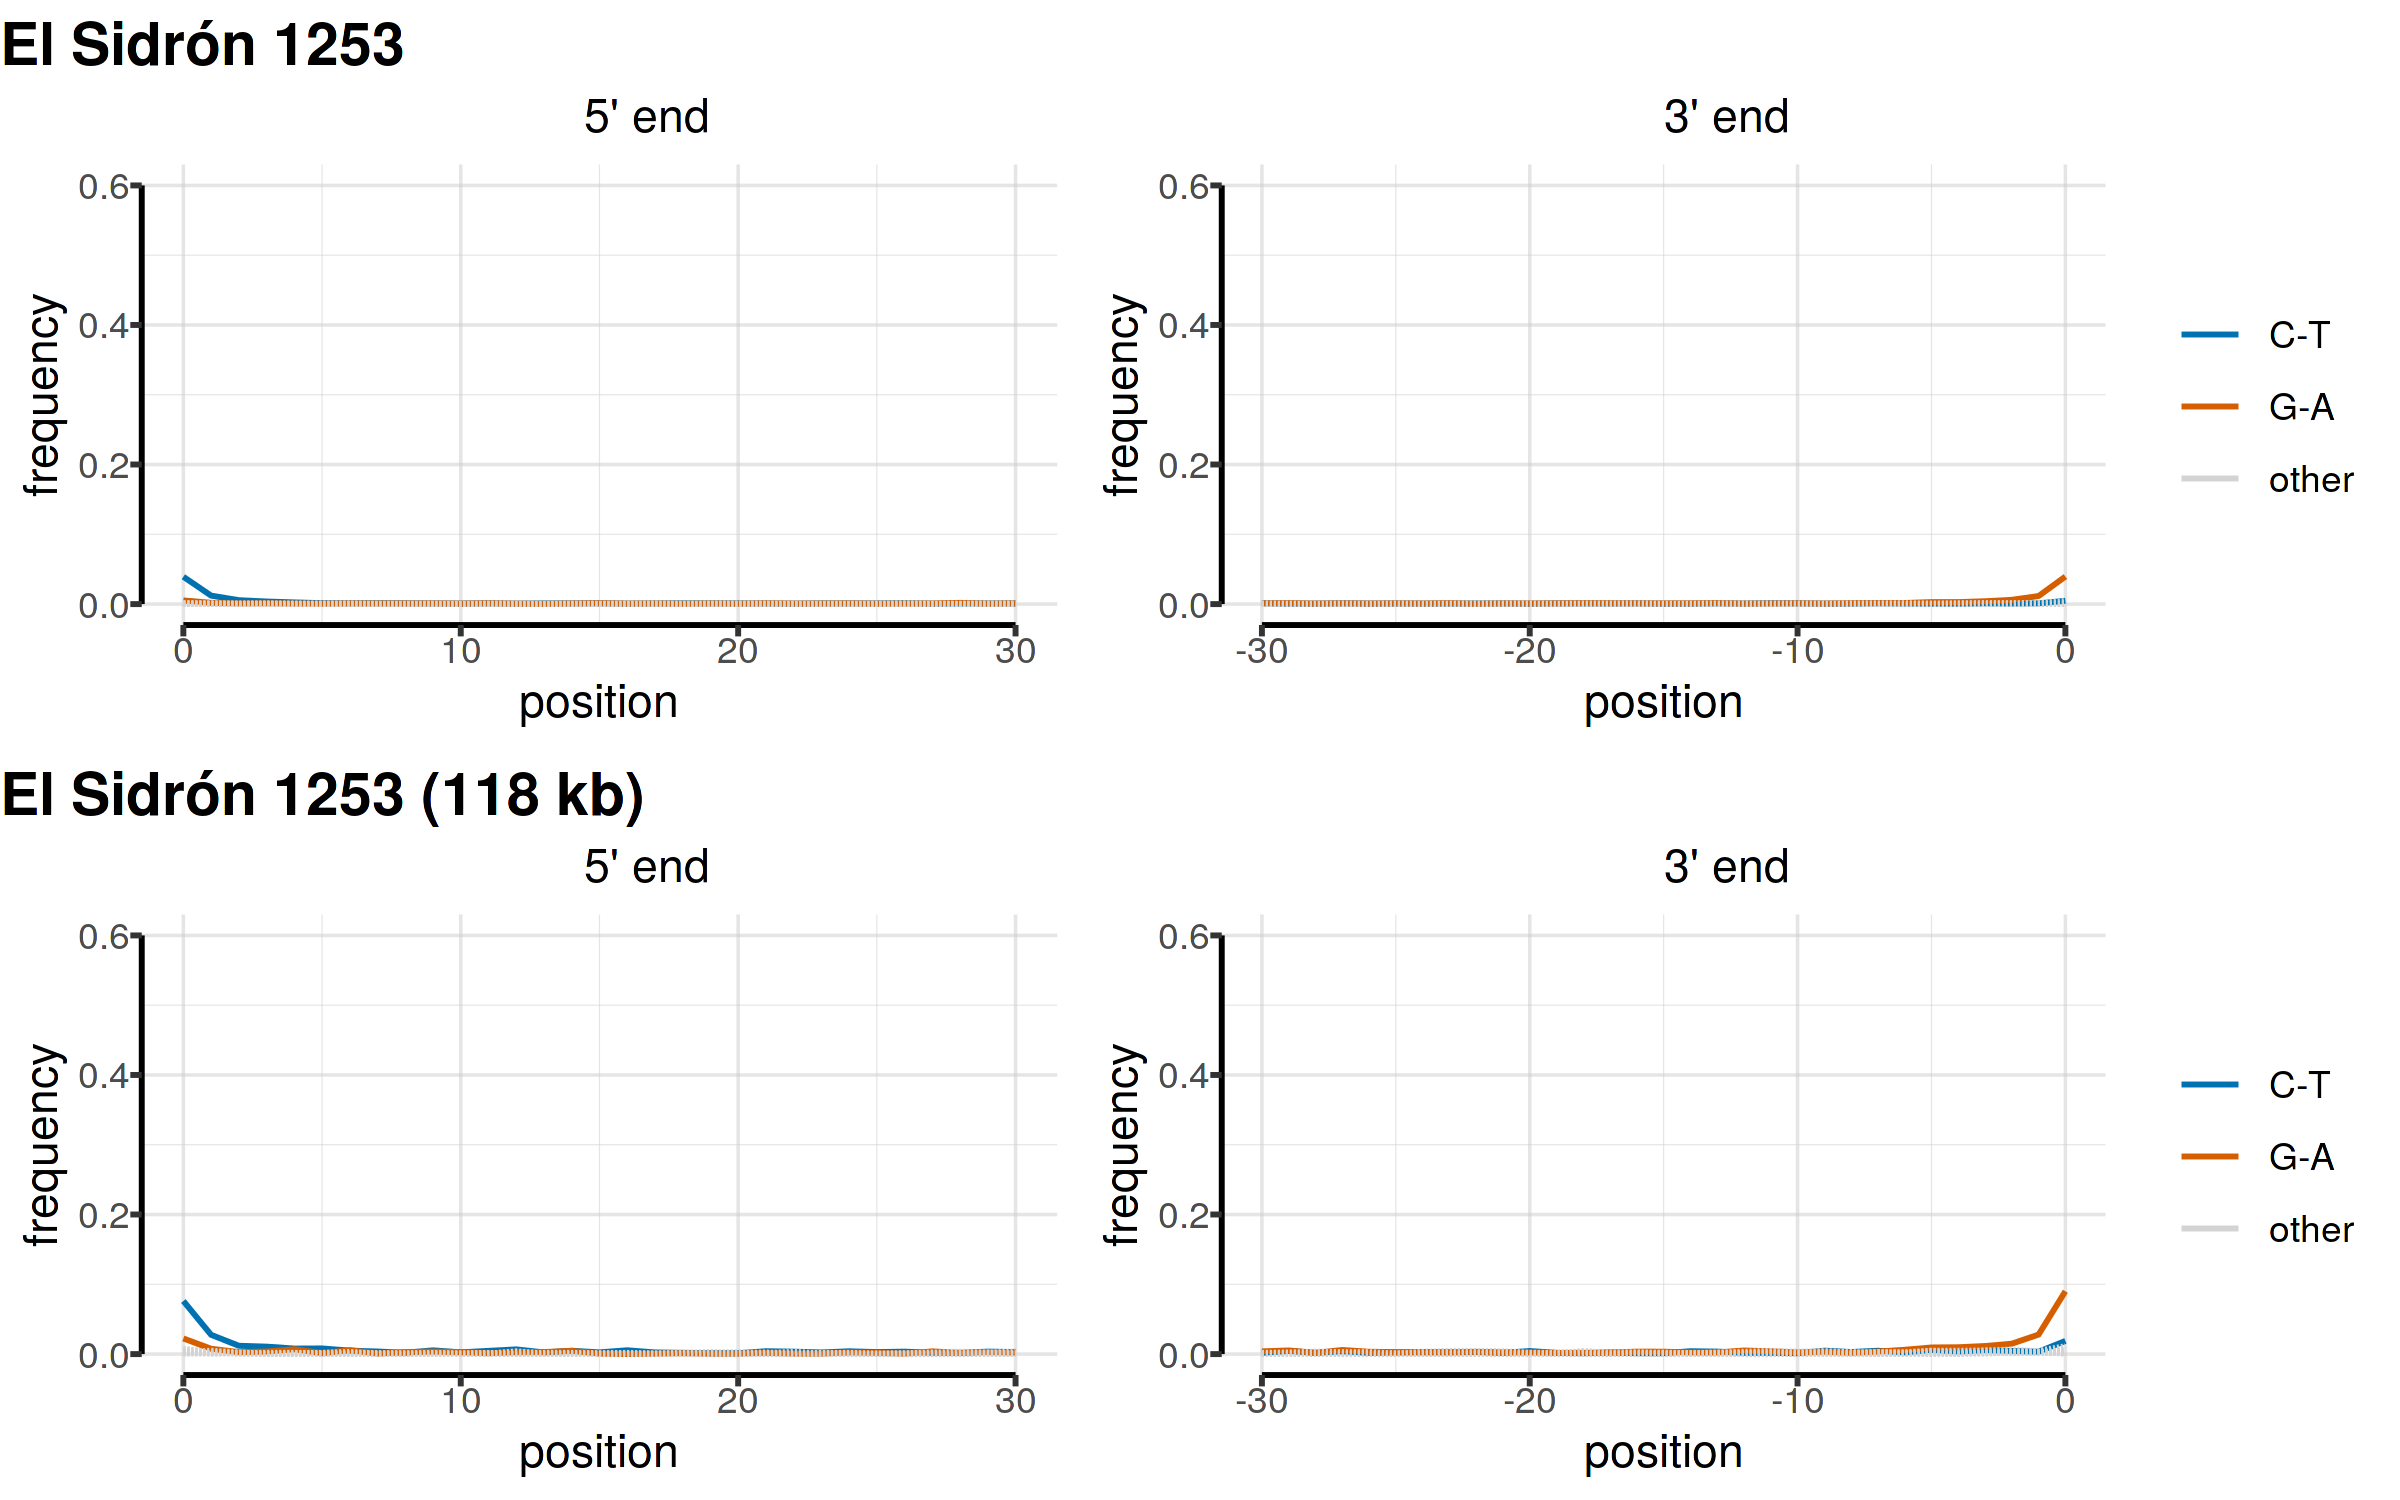

In [9]:
set_dim(8, 5)

plot_grid(
    plot_damage("elsidron2", "lippold"),
    plot_damage("elsidron1", "exome"),
    ncol = 1
)